# Exploratory Data Analysis for Telcom Customer Churn

In this project, I am going to do an analysis by exploring the data of Telcom Customer Churn using `Python`


In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', 200)

%matplotlib inline

#calculate multicollinearity (vif score)
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

In [2]:
df = pd.read_csv('./dataset/Telco-Customer-Churn.csv')

# Dealing with missing values/ null value
df = df.drop(df[df['TotalCharges'] == ' '].index)
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [6]:
category_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines','OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','PaperlessBilling']

ordinal_columns = ['InternetService', 'Contract', 'PaymentMethod']

numerical_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [7]:
def categorical_plots(df, category, type):

    num_cols = 3
    length = len(category)
    num_rows = length // 3 + 1 if length % 3 != 0 else length // 3 

    if type == 'categorical':
        size_x, size_y = (15, 9)
    elif type == 'ordinal' :
        size_x, size_y = (15,4)
        
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(size_x,size_y))

    colors = ['#EC7063', '#A569BD','#EC407A', '#2196F3', '#00ACC1', '#FB8C00']
              
    for index, axes in enumerate(axs.flatten()[:length]):
        df[category[index]].value_counts(normalize=False).plot(kind='bar',
                                                               ax = axes, 
                                                               title = category[index].capitalize(),
                                                               color = colors[index]).set_xlabel("")
        axes.set_ylim(0,10000)

        if type == 'categorical':
            axes.tick_params(axis='x', rotation=0)
        elif type == 'ordinal':
            axes.tick_params(axis='x', rotation=45)
    
        position = df[category[index]].value_counts(normalize=True)
        get_position = df[category[index]].value_counts(normalize=False).to_list()
        data_point = position.apply(lambda x : x*100).astype('str').apply(lambda x : x[:5] +" %").tolist()

        for i in range(len(get_position)):
            axes.text(i, get_position[i] + 200, data_point[i], 
                      ha='center', color = 'black', fontsize=10)
    
    plt.subplots_adjust(wspace=0.2, 
                        hspace=0.3)
    
    #plt.savefig(path + f'uninvariate-{type}-value.png')

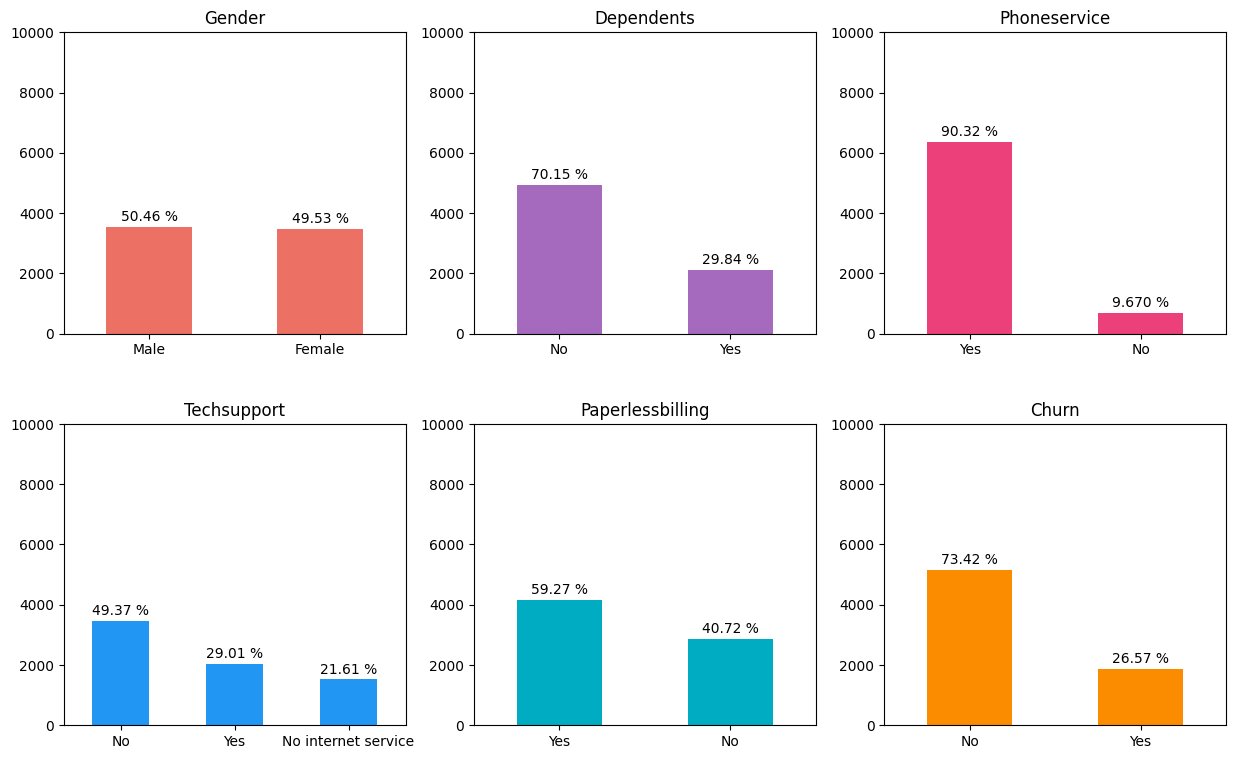

In [8]:
category = ['gender', 'Dependents', 'PhoneService',
            'TechSupport', 'PaperlessBilling', 'Churn']
categorical_plots(df, category, 'categorical')

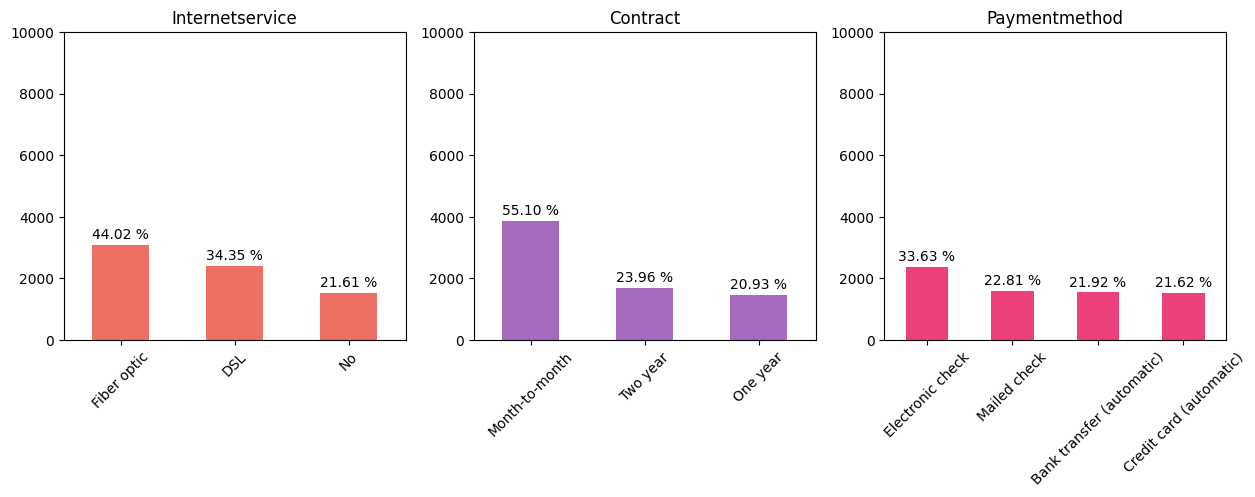

In [9]:
categorical_plots(df, ordinal_columns, 'ordinal')

In [10]:
def numeric_plot(df, numerical, type):
    
    numeric = numerical_columns[1:]
    columns = ['Tenure', 'Monthly Charges', 'Total Charges']
    
    fig_num, axes_num = plt.subplots(1,3, figsize= (18,5))

    colors = ['#EC407A', '#A569BD','#00ACC1']
    
    for index, axes in enumerate(axes_num.ravel()):
        if type == 'hist':
            plot = sns.histplot(df[numeric[index]], 
                                kde=True, ax=axes, color = colors[index])
        elif type == 'box':
            plot =  sns.boxplot(df[numeric[index]], 
                                ax=axes, color = colors[index])
        plot.set(xlabel = '', ylabel='Frequency', title = columns[index])
        
        
    fig_num.tight_layout()
    #plt.savefig(path + f'numeric-{type}-value.png')


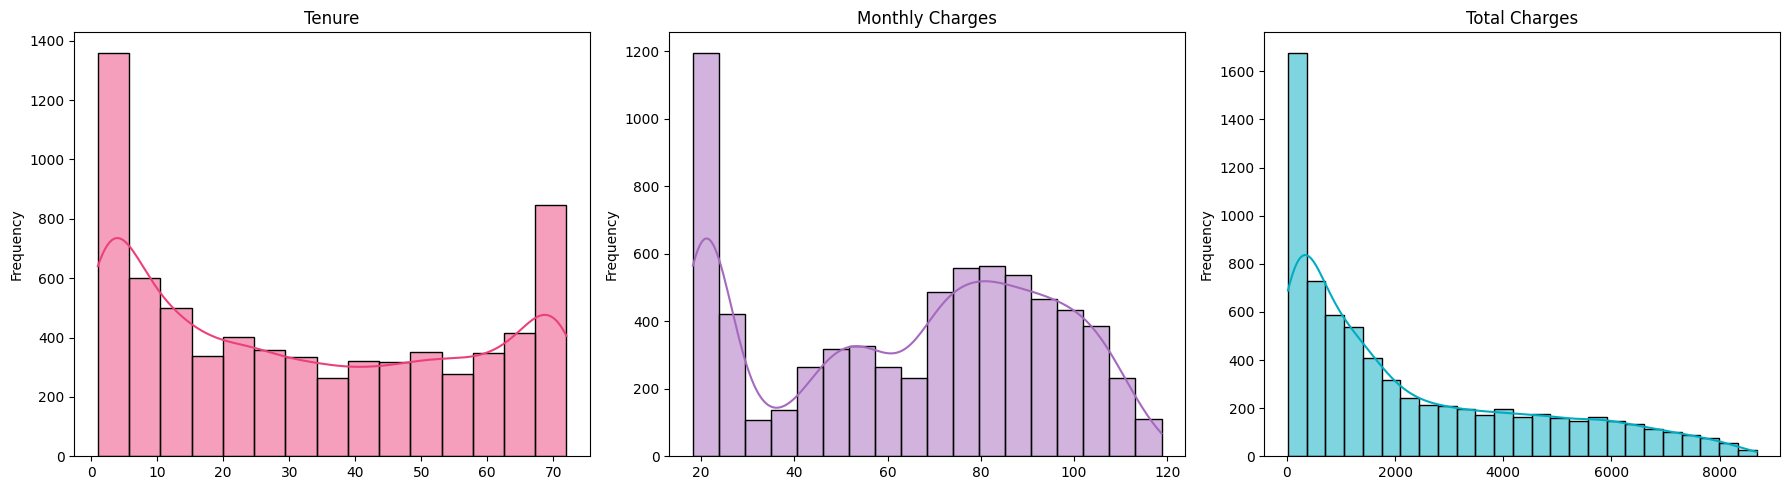

In [11]:
numeric_plot(df, numerical_columns, 'hist')

In [12]:
def bivariate_bar_plot(df, ordinal_columns, target_variabel, type):

    if type == 'bar':
    
        fig, axs = plt.subplots(1, 3, figsize=(12,5))
    
        colors = ["Set2", "flare"]
        
        for index, axes in enumerate(axs.flatten()):
            
            plot = sns.countplot(x = ordinal_columns[index], hue = target_variabel, data=df, 
                                 ax = axes, palette = colors[index])
        
            plot.set(xlabel='', ylabel = 'Frequency', title=ordinal_columns[index])
                        
            for index, p in enumerate(axes.patches):    
                height = p.get_height()
                x = p.get_x() + (p.get_width()/2)
                if x != 0.0:
                    axes.text(x, y = height + 30, s = '{:.0f}'.format(height), ha = 'center')
                    
    elif type == 'barstacked':
        
        fig, axs = plt.subplots(1,3, figsize = (18,5))
    
        colors = [['tomato','lightseagreen'], ['#A569BD','#00ACC1'], ['#00ACC1', '#FB8C00']]
        
        for index, axes in enumerate(axs.flatten()):
            df_stack = df.groupby([target_variabel, ordinal_columns[index]]).size().reset_index()
            df_stack = df_stack.pivot(columns= target_variabel, index= ordinal_columns[index], values=0)
            df_reverse = df_stack[df_stack.columns[::-1]]
            
            df_reverse.plot(kind='bar', stacked=True, ax = axes, 
                            title = ordinal_columns[index], color = colors[index],
                            ylabel = 'Frequency').set_xlabel("")
        
            axes.tick_params(axis='x', rotation=0)
            
            for c in axes.containers:
                label = [int(l.get_height()) for l in c]
                axes.bar_label(c, labels = label, label_type = 'edge') 

    #plt.savefig(path + f'bivariate-{type}-value.png')


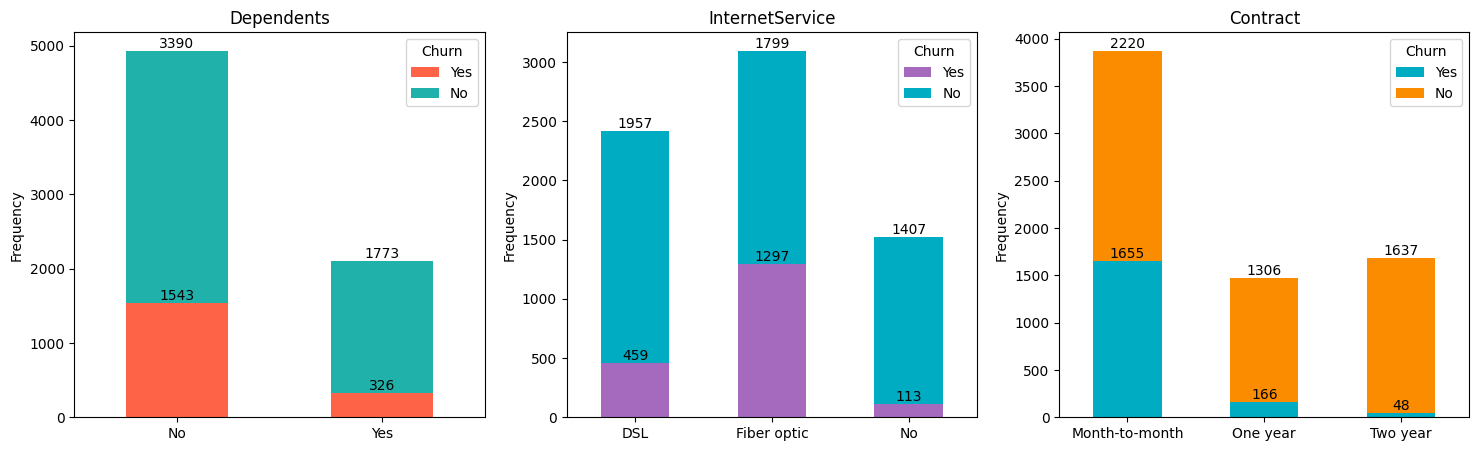

In [13]:
columns = ['Dependents', 'InternetService', 'Contract']
bivariate_bar_plot(df, columns, 'Churn', 'barstacked')

In [14]:
def multivariate_plots(df, numeric, category, target_variable):
    
    bin = np.linspace(df[numeric].min(), df[numeric].max(), 50)
    graph = sns.FacetGrid(df, col=category, hue = target_variable, palette="Set2", 
                          col_wrap=3, height = 7, aspect=1.1)
    graph.map(plt.hist, numeric, bins=bin, ec="k")
    
    for ax in graph.axes.ravel():
        ax.legend(title= target_variable)
        
    graph.set(ylabel = 'Frequency', xlabel= numeric)

    #plt.savefig(path + 'multivariate-value.png')
    
    plt.show()

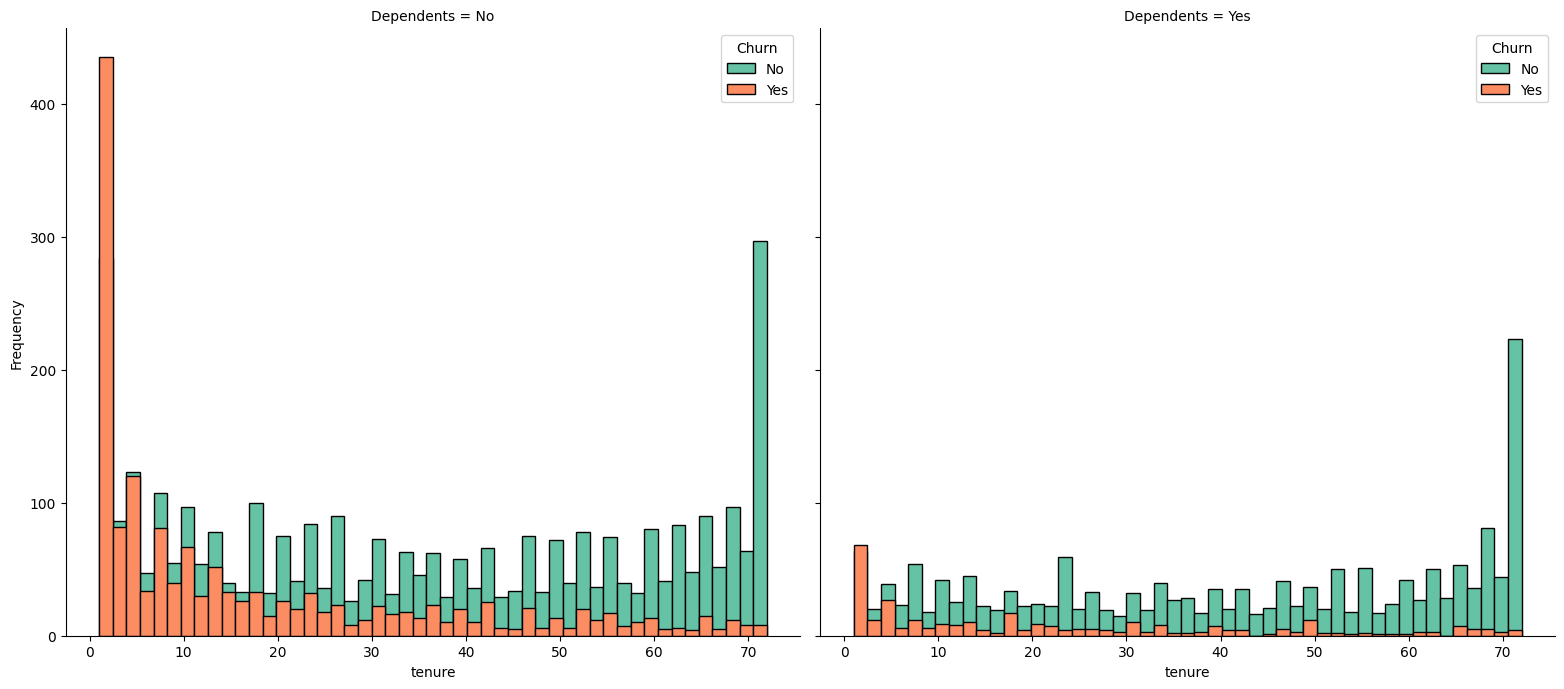

In [15]:
multivariate_plots(df, 'tenure', 'Dependents', 'Churn')

In [16]:
for col in df.columns:
    if df[col].dtypes == object:
        print('{} : {}'.format(col, df[col].unique()))

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [37]:
# Encode the categorical variable into numeric
def label_encoding(df):
    
    for col in df.columns:
        df[col] = df[col].replace({'Male' : 1.0, 'Female' : 0.0,
                                   'Yes' : 1.0, 'No' : 0.0,
                                   'No phone service' : 0.0,
                                   'No internet service' : 0.0})
    return df.drop(columns = 'customerID')

# Encode ordinal columns, and drop first encoding-columns to avoid multicollinearity
def onehotencoding(df, columns):
    onehot = pd.DataFrame()
    for col in columns:
        encoding = pd.get_dummies(df[col], prefix=col, dtype='float')
        encoding = encoding.drop(encoding.columns[0], axis=1)
        onehot = pd.concat([onehot, encoding], axis=1)
    
    return onehot

# Calculate multicollinearity
def calculate_vif(feature):
    X = add_constant(feature)
    vif_df = pd.DataFrame([vif(X.values, i) for i in range(X.shape[1])], 
                          index = X.columns).reset_index()
    vif_df.columns = ['feature', 'vif_score']
    vif_df = vif_df.loc[vif_df.feature != 'const']
    return vif_df

# Final cleaning to get feature and target data
def feature_cleaning(df, ordinal_columns):
    df_encode = label_encoding(df)

    # Drop the ordinal columns from dataframe first
    df_encode = df_encode.drop(columns=ordinal_columns)
    feature = df_encode.drop(columns='Churn')
    target = df_encode['Churn']

    # Drop MonthlyCharges and TotalCharges since their vif score are high/ high correlated
    feature = feature.drop(columns=['MonthlyCharges', 'TotalCharges'])

    # Encode ordinal columns in the dataframe
    onehot = onehotencoding(df, ordinal_columns)
    feature = pd.concat([feature, onehot], axis=1)
    return feature, target

In [38]:
feature, target = feature_cleaning(df, ordinal_columns)

# Check the vif score
calculate_vif(feature)

,feature,vif_score
1,gender,1.001769
2,SeniorCitizen,1.153168
3,Partner,1.462369
4,Dependents,1.380811
5,tenure,2.827609
6,PhoneService,1.354768
7,MultipleLines,1.423682
8,OnlineSecurity,1.415235
9,OnlineBackup,1.380823
10,DeviceProtection,1.480118
